# AI project: Women's Apparel Sentiment Analysis

## Initialization phase
The main objective in this phase is to import the required modules, prepare some sql queries that will be used to fetch data from the database, and finally create three data access objects for different products.

In [1]:
from platform import python_version
print(python_version())

3.12.5


In [2]:
from dao import DAO as db_object
import matplotlib.pyplot as plt

In [ ]:
fetch_valid_jeans_query = """
select rating, recommend, validation_result, problem_category from validated_reviews_jeans where validation_result
= 't'; """

fetch_valid_jackets_query = """
select rating, recommend, validation_result, problem_category from validated_reviews_jacket where validation_result
= 't'; """

fetch_valid_pants_query = """
select rating, recommend, validation_result, problem_category from validated_reviews_pants where validation_result
= 't'; """

In [4]:
jeans_data = db_object( fetch_valid_jeans_query)
jackets_data = db_object( fetch_valid_jackets_query)
pants_data = db_object( fetch_valid_pants_query)

Database connection established successfully.
Database connection closed.
Database connection established successfully.
Database connection closed.
Database connection established successfully.
Database connection closed.


## Rating Percentages
The Pie charts generated after running the code in this section visualize the data distribution when it comes to rating. Since the main objective of this project is to identify the flaws pointed out in customer reviews, only ratings below 3 are considered. There are three charts, and each one of them displays the customers' rating distribution in percent.

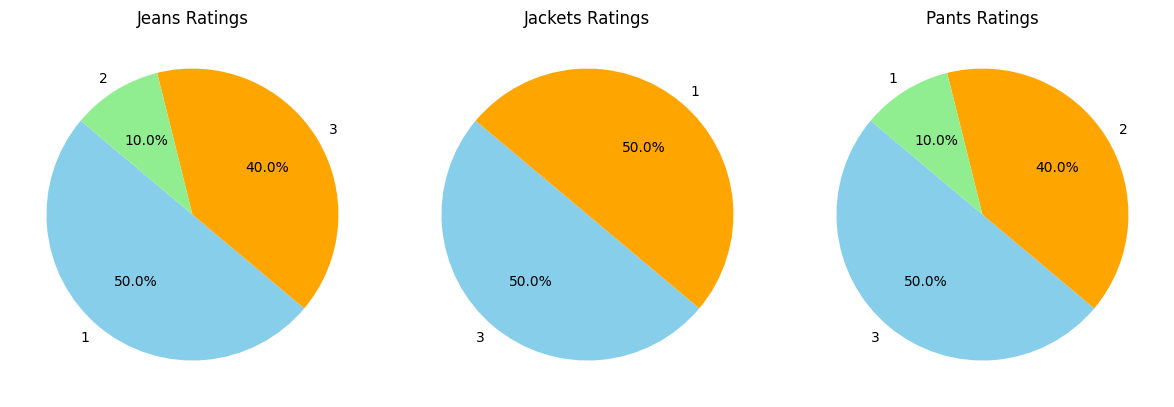

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4)) 

# Pie chart for jeans
jeans_rating_percentages, jeans_rating_percentages_index = jeans_data.get_rating_percentages()
axes[0].pie(jeans_rating_percentages, labels=jeans_rating_percentages_index, autopct='%1.1f%%', startangle=140, 
            colors=['skyblue', 'orange', 'lightgreen', 'salmon', 'lightcoral'])
axes[0].set_title('Jeans Ratings')

# Pie chart for jackets
jackets_rating_percentages, jackets_rating_percentages_index = jackets_data.get_rating_percentages()
axes[1].pie(jackets_rating_percentages, labels=jackets_rating_percentages_index, autopct='%1.1f%%', startangle=140, 
            colors=['skyblue', 'orange', 'lightgreen', 'salmon', 'lightcoral'])
axes[1].set_title('Jackets Ratings')

# Pie chart for pants
pants_rating_percentages, pants_rating_percentages_index = pants_data.get_rating_percentages()
axes[2].pie(pants_rating_percentages, labels=pants_rating_percentages_index, autopct='%1.1f%%', startangle=140, 
            colors=['skyblue', 'orange', 'lightgreen', 'salmon', 'lightcoral'])
axes[2].set_title('Pants Ratings')

plt.tight_layout()
plt.show()

## Product Review Segmentation Analysis

The Pie charts in this section aim to provide insights into customers' reviews in a more structured way. Reviews that are written in plain text are classified and the main ideas are collected using state-of-the-art opener's large language model. A pie chart here showcases how many percent of the reviews where highlighting specific problems with a certain category of women's clothes. 

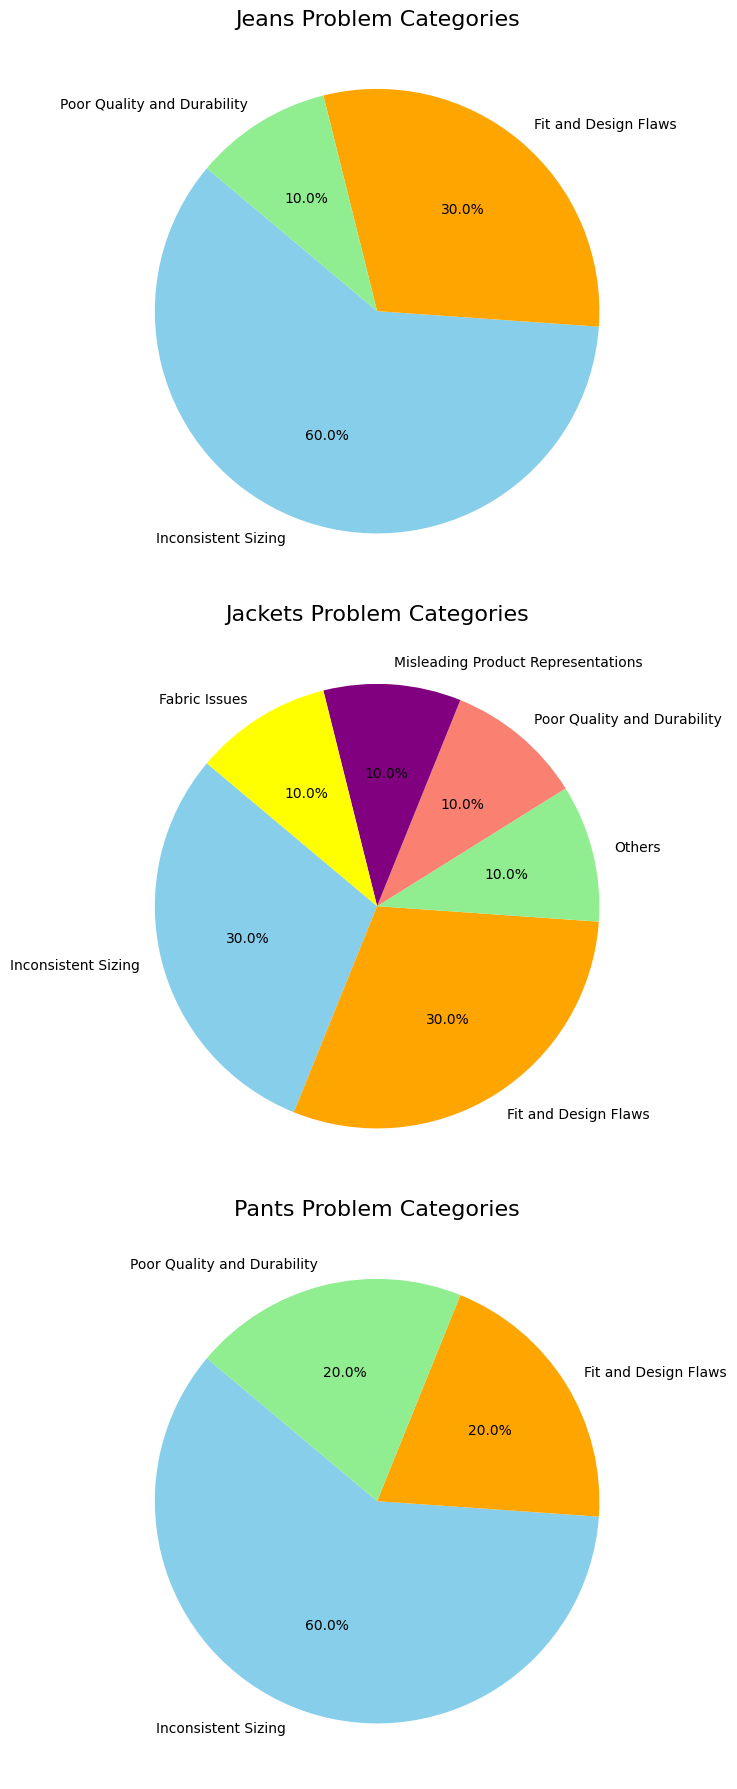

In [6]:
fig, axes = plt.subplots(3, 1, figsize=(10, 18))  # 3 rows, 1 column, larger figure size

# Pie chart for jeans
jeans_category_percentages, jeans_category_percentages_index = jeans_data.get_category_percentages()
axes[0].pie(jeans_category_percentages, labels=jeans_category_percentages_index, autopct='%1.1f%%', startangle=140, 
            colors=['skyblue', 'orange', 'lightgreen', 'salmon', 'purple', 'yellow', 'pink', 'lightcoral'])
axes[0].set_title('Jeans Problem Categories', fontsize=16)

# Pie chart for jackets
jackets_category_percentages, jackets_category_percentages_index = jackets_data.get_category_percentages()
axes[1].pie(jackets_category_percentages, labels=jackets_category_percentages_index, autopct='%1.1f%%', startangle=140, 
            colors=['skyblue', 'orange', 'lightgreen', 'salmon', 'purple', 'yellow', 'pink', 'lightcoral'])
axes[1].set_title('Jackets Problem Categories', fontsize=16)

# Pie chart for pants
pants_category_percentages, pants_category_percentages_index = pants_data.get_category_percentages()
axes[2].pie(pants_category_percentages, labels=pants_category_percentages_index, autopct='%1.1f%%', startangle=140, 
            colors=['skyblue', 'orange', 'lightgreen', 'salmon', 'purple', 'yellow', 'pink', 'lightcoral'])
axes[2].set_title('Pants Problem Categories', fontsize=16)

plt.tight_layout()
plt.show()

## Product Recommendation Analysis
The bar charts in this section display customer's opinions when they are asked whether they recommend the product or not after all. Each chart targets a specific category of products - in this project, only jeans, jackets, and pants are considered.

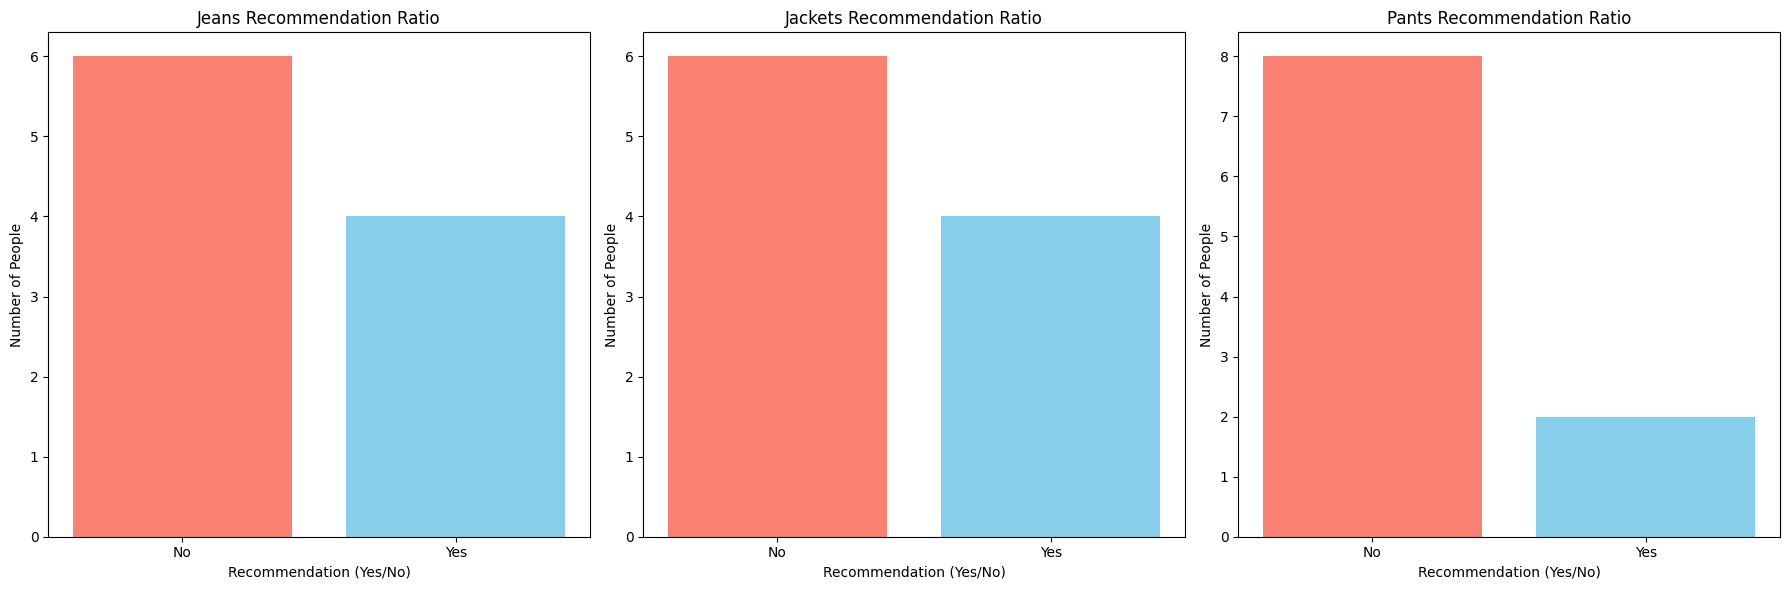

In [7]:

jeans_recommend_counts, jeans_recommend_counts_index = jeans_data.get_recommend_bar()
jackets_recommend_counts, jackets_recommend_counts_index = jackets_data.get_recommend_bar()
pants_recommend_counts, pants_recommend_counts_index = pants_data.get_recommend_bar()
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  

# Plot for Jeans
axes[0].bar(jeans_recommend_counts_index, jeans_recommend_counts, color=[ 'salmon', 'skyblue'])
axes[0].set_xlabel('Recommendation (Yes/No)')
axes[0].set_ylabel('Number of People')
axes[0].set_title('Jeans Recommendation Ratio')

# Plot for Jackets
axes[1].bar(jackets_recommend_counts_index, jackets_recommend_counts, color=[ 'salmon', 'skyblue'])
axes[1].set_xlabel('Recommendation (Yes/No)')
axes[1].set_ylabel('Number of People')
axes[1].set_title('Jackets Recommendation Ratio')

# Plot for Pants
axes[2].bar(pants_recommend_counts_index, pants_recommend_counts, color=[ 'salmon', 'skyblue'])
axes[2].set_xlabel('Recommendation (Yes/No)')
axes[2].set_ylabel('Number of People')
axes[2].set_title('Pants Recommendation Ratio')

plt.tight_layout()
plt.show()